# A Visual History of Nobel Prize Winners

<blockquote> 
The Nobel Prize is perhaps the world's most well known scientific award. Every year it is given to scientists and scholars in chemistry, literature, physics, medicine, economics, and peace. The first Nobel Prize was handed out in 1901, and at that time the prize was Eurocentric and male-focused, but nowadays it's not biased in any way. Surely, right?
<br><br>
Well, let's find out! In this project, you get to explore patterns and trends over 100 years worth of Nobel Prize winners. What characteristics do the prize winners have? Which country gets it most often? And has anybody gotten it twice? It's up to you to figure this out.
</blockquote>

### Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib notebook
import os
import seaborn as sns
import collections as co

### Read Raw Data

In [2]:
debug = 1
file_path = os.path.join(os.path.pardir,'A Visual History of Nobel Prize Winners','Data', 'archive.csv')
if debug:
    print("File Path: "+file_path)
df = pd.read_csv(file_path)
#df.sample(5)
df.head(5)

File Path: ..\A Visual History of Nobel Prize Winners\Data\archive.csv


,Year,Category,Prize,Motivation,Prize Share,Laureate ID,Laureate Type,Full Name,Birth Date,Birth City,Birth Country,Sex,Organization Name,Organization City,Organization Country,Death Date,Death City,Death Country
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,160,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Male,Berlin University,Berlin,Germany,1911-03-01,Berlin,Germany
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,569,Individual,Sully Prudhomme,1839-03-16,Paris,France,Male,NaN,NaN,NaN,1907-09-07,Châtenay,France
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,293,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Male,Marburg University,Marburg,Germany,1917-03-31,Marburg,Germany
3,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,462,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Male,NaN,NaN,NaN,1910-10-30,Heiden,Switzerland
4,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,463,Individual,Frédéric Passy,1822-05-20,Paris,France,Male,NaN,NaN,NaN,1912-06-12,Paris,France


### Raw Data Preprocessing

In [3]:
print("Data Shape:\n %s Rows \n %s Columns" % (df.shape[0], df.shape[1]))

Data Shape:
 969 Rows 
 18 Columns


In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 969 entries, 0 to 968
Data columns (total 18 columns):
Year                    969 non-null int64
Category                969 non-null object
Prize                   969 non-null object
Motivation              881 non-null object
Prize Share             969 non-null object
Laureate ID             969 non-null int64
Laureate Type           969 non-null object
Full Name               969 non-null object
Birth Date              940 non-null object
Birth City              941 non-null object
Birth Country           943 non-null object
Sex                     943 non-null object
Organization Name       722 non-null object
Organization City       716 non-null object
Organization Country    716 non-null object
Death Date              617 non-null object
Death City              599 non-null object
Death Country           605 non-null object
dtypes: int64(2), object(16)
memory usage: 136.3+ KB
None


In [5]:
# Columns' name are descriptive no need for rename
# Death Info is not needed for this project analysis purposes
df.drop(columns=['Death Date','Death City', 'Death Country'], inplace=True)

In [6]:
def check_null(df):
    if(True in df.isnull().any().tolist()):
        print(df.isnull().sum())
    else:
        print("No Nulls:")
        print("*****************************************")
        print(df.isnull().sum())
check_null(df)

Year                      0
Category                  0
Prize                     0
Motivation               88
Prize Share               0
Laureate ID               0
Laureate Type             0
Full Name                 0
Birth Date               29
Birth City               28
Birth Country            26
Sex                      26
Organization Name       247
Organization City       253
Organization Country    253
dtype: int64


### Dealing with Missing Data

<h4> <font color="darkblue">Let's start with Sex Column Analysis </font> </h4>

In [7]:
df[df['Sex'].isnull()]

,Year,Category,Prize,Motivation,Prize Share,Laureate ID,Laureate Type,Full Name,Birth Date,Birth City,Birth Country,Sex,Organization Name,Organization City,Organization Country
24,1904,Peace,The Nobel Peace Prize 1904,NaN,1/1,467,Organization,Institut de droit international (Institute of ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
61,1910,Peace,The Nobel Peace Prize 1910,NaN,1/1,477,Organization,Bureau international permanent de la Paix (Per...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
90,1917,Peace,The Nobel Peace Prize 1917,NaN,1/1,482,Organization,Comité international de la Croix Rouge (Intern...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
206,1938,Peace,The Nobel Peace Prize 1938,NaN,1/1,503,Organization,Office international Nansen pour les Réfugiés ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
222,1944,Peace,The Nobel Peace Prize 1944,NaN,1/1,482,Organization,Comité international de la Croix Rouge (Intern...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
244,1947,Peace,The Nobel Peace Prize 1947,NaN,1/2,508,Organization,Friends Service Council (The Quakers),NaN,NaN,NaN,NaN,NaN,NaN,NaN
245,1947,Peace,The Nobel Peace Prize 1947,NaN,1/2,509,Organization,American Friends Service Committee (The Quakers),NaN,NaN,NaN,NaN,NaN,NaN,NaN
295,1954,Peace,The Nobel Peace Prize 1954,NaN,1/1,515,Organization,Office of the United Nations High Commissioner...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
365,1963,Peace,The Nobel Peace Prize 1963,NaN,1/2,482,Organization,Comité international de la Croix Rouge (Intern...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
366,1963,Peace,The Nobel Peace Prize 1963,NaN,1/2,523,Organization,Ligue des Sociétés de la Croix-Rouge (League o...,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### We can see Sex is not actually missing. Only rows with "Laureate Type" = "Organization" have the field unfilled.

In [8]:
print(pd.unique(df['Laureate Type']))
print("*****************************************")
df[df['Laureate Type'] == 'Organization']

['Individual' 'Organization']
*****************************************


,Year,Category,Prize,Motivation,Prize Share,Laureate ID,Laureate Type,Full Name,Birth Date,Birth City,Birth Country,Sex,Organization Name,Organization City,Organization Country
24,1904,Peace,The Nobel Peace Prize 1904,NaN,1/1,467,Organization,Institut de droit international (Institute of ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
61,1910,Peace,The Nobel Peace Prize 1910,NaN,1/1,477,Organization,Bureau international permanent de la Paix (Per...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
90,1917,Peace,The Nobel Peace Prize 1917,NaN,1/1,482,Organization,Comité international de la Croix Rouge (Intern...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
206,1938,Peace,The Nobel Peace Prize 1938,NaN,1/1,503,Organization,Office international Nansen pour les Réfugiés ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
222,1944,Peace,The Nobel Peace Prize 1944,NaN,1/1,482,Organization,Comité international de la Croix Rouge (Intern...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
244,1947,Peace,The Nobel Peace Prize 1947,NaN,1/2,508,Organization,Friends Service Council (The Quakers),NaN,NaN,NaN,NaN,NaN,NaN,NaN
245,1947,Peace,The Nobel Peace Prize 1947,NaN,1/2,509,Organization,American Friends Service Committee (The Quakers),NaN,NaN,NaN,NaN,NaN,NaN,NaN
295,1954,Peace,The Nobel Peace Prize 1954,NaN,1/1,515,Organization,Office of the United Nations High Commissioner...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
365,1963,Peace,The Nobel Peace Prize 1963,NaN,1/2,482,Organization,Comité international de la Croix Rouge (Intern...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
366,1963,Peace,The Nobel Peace Prize 1963,NaN,1/2,523,Organization,Ligue des Sociétés de la Croix-Rouge (League o...,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### For the record, rows with "Laureate Type" = "Organization" have half of the fields unfilled
#### Also, there are 4 individuals have "Laureate Type" = "Organization"
#### If there many Organization rows?!

There are 26 rows representing Organizations.
Organization records form 2.7% of the whole data-set records
*****************************************


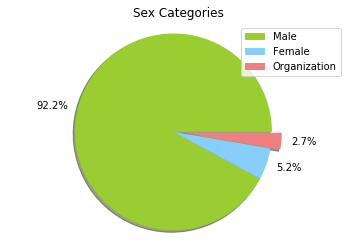

In [9]:
df.loc[df['Sex'].isnull(), 'Sex']= 'Organization'
# Here we calculate organization rows count and percentage
org_count = len(df[(df['Laureate Type'] == 'Organization') & ((df['Sex'] == 'Organization'))])
org_percent = round((org_count/df.shape[0])*100, 1)
print("There are "+str(org_count)+" rows representing Organizations.")
print("Organization records form "+str(org_percent)+"% of the whole data-set records")

print("*****************************************")
# Here we plot the three Sex categories available 
unique_sex = pd.unique(df['Sex'])
unique_sex_counts = df.Sex.value_counts().values
unique_sex_percent = (unique_sex_counts/df.shape[0])*100
unique_sex_percent = [round(x,1) for x in unique_sex_percent]
percent_ = [str(x)+"%" for x in unique_sex_percent]
colors = ['yellowgreen',  'lightskyblue', 'lightcoral']
explode = (0, 0, 0.1)  
patches, texts = plt.pie(unique_sex_percent,labels=percent_, explode=explode,colors=colors,
        shadow=True, startangle=0)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.legend(patches, unique_sex, loc=1)
plt.title('Sex Categories')
plt.show()

#### Organization rows form less than 3% of the whole data-set with almost half of the columns empty
#### Better to drop these rows than spend time gathering data for them

In [10]:
df = df.drop(df[df['Sex']=='Organization'].index)

In [11]:
print("Data Shape:\n %s Rows \n %s Columns" % (df.shape[0], df.shape[1]))
print("*****************************************")
print(df.info())
print("*****************************************")
print(df.isnull().sum())

Data Shape:
 943 Rows 
 15 Columns
*****************************************
<class 'pandas.core.frame.DataFrame'>
Int64Index: 943 entries, 0 to 968
Data columns (total 15 columns):
Year                    943 non-null int64
Category                943 non-null object
Prize                   943 non-null object
Motivation              871 non-null object
Prize Share             943 non-null object
Laureate ID             943 non-null int64
Laureate Type           943 non-null object
Full Name               943 non-null object
Birth Date              940 non-null object
Birth City              941 non-null object
Birth Country           943 non-null object
Sex                     943 non-null object
Organization Name       722 non-null object
Organization City       716 non-null object
Organization Country    716 non-null object
dtypes: int64(2), object(13)
memory usage: 117.9+ KB
None
*****************************************
Year                      0
Category                  0
Priz

<h4> <font color="darkblue">Let's start with Motivation Column Analysis </font> </h4>

In [12]:
df[df['Motivation'].isnull()]

,Year,Category,Prize,Motivation,Prize Share,Laureate ID,Laureate Type,Full Name,Birth Date,Birth City,Birth Country,Sex,Organization Name,Organization City,Organization Country
3,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,462,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Male,NaN,NaN,NaN
4,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,463,Individual,Frédéric Passy,1822-05-20,Paris,France,Male,NaN,NaN,NaN
9,1902,Peace,The Nobel Peace Prize 1902,NaN,1/2,464,Individual,Élie Ducommun,1833-02-19,Geneva,Switzerland,Male,NaN,NaN,NaN
10,1902,Peace,The Nobel Peace Prize 1902,NaN,1/2,465,Individual,Charles Albert Gobat,1843-05-21,Tramelan,Switzerland,Male,NaN,NaN,NaN
16,1903,Peace,The Nobel Peace Prize 1903,NaN,1/1,466,Individual,William Randal Cremer,1828-03-18,Fareham,United Kingdom,Male,NaN,NaN,NaN
29,1905,Peace,The Nobel Peace Prize 1905,NaN,1/1,468,Individual,"Baroness Bertha Sophie Felicita von Suttner, n...",1843-06-09,Prague,Austrian Empire (Czech Republic),Female,NaN,NaN,NaN
35,1906,Peace,The Nobel Peace Prize 1906,NaN,1/1,470,Individual,Theodore Roosevelt,1858-10-27,"New York, NY",United States of America,Male,NaN,NaN,NaN
40,1907,Peace,The Nobel Peace Prize 1907,NaN,1/2,471,Individual,Ernesto Teodoro Moneta,1833-09-20,Milan,Austrian Empire (Italy),Male,NaN,NaN,NaN
41,1907,Peace,The Nobel Peace Prize 1907,NaN,1/2,472,Individual,Louis Renault,1843-05-21,Autun,France,Male,Sorbonne University,Paris,France
48,1908,Peace,The Nobel Peace Prize 1908,NaN,1/2,473,Individual,Klas Pontus Arnoldson,1844-10-27,Gothenburg,Sweden,Male,NaN,NaN,NaN


#### All rows with missing motivation are for peace prizes, so either fill it with descriptive text or drop the whole motivation columns

#### We can leave it filled with "For Efforts in Peace" for analysis purposes beyond this project tasks.

In [13]:
df.loc[df['Motivation'].isnull(), 'Motivation']= 'For efforts in Peace'

In [14]:
check_null(df)

Year                      0
Category                  0
Prize                     0
Motivation                0
Prize Share               0
Laureate ID               0
Laureate Type             0
Full Name                 0
Birth Date                3
Birth City                2
Birth Country             0
Sex                       0
Organization Name       221
Organization City       227
Organization Country    227
dtype: int64


<h4> <font color="darkblue">Let's start with Birth Info Columns Analysis </font> </h4>

#### Birth Info are missing in only few records as shown above, that could be filled manually.

In [15]:
print("Winners with Birth City Missing:")
print(df.loc[df["Birth City"].isnull(), "Full Name"])
print("*****************************************")
print("Winners with Birth Date Missing:")
print(df.loc[df["Birth Date"].isnull(), "Full Name"])

Winners with Birth City Missing:
750    Sir Vidiadhar Surajprasad Naipaul
880                           Liu Xiaobo
Name: Full Name, dtype: object
*****************************************
Winners with Birth Date Missing:
853    Venkatraman Ramakrishnan
894             Saul Perlmutter
895             Saul Perlmutter
Name: Full Name, dtype: object


In [16]:
df.loc[df["Full Name"]=="Venkatraman Ramakrishnan", "Birth Date"] = "1952-04-05"
df.loc[df["Full Name"]=="Saul Perlmutter", "Birth Date"] = "1952-09-22"
df.loc[df["Full Name"]=="Sir Vidiadhar Surajprasad Naipaul", "Birth City"] = "Chaguanas"
df.loc[df["Full Name"]=="Liu Xiaobo", "Birth City"] = " Changchun"

#### is Saul Perlmutter a duplicate ?

In [17]:
print(df[df.duplicated(['Year','Category','Prize','Motivation','Prize Share','Laureate ID','Laureate Type','Full Name','Birth Date','Birth City','Birth Country','Sex','Organization Name','Organization City','Organization Country'])])
print("*****************************************")
df[df["Full Name"]=="Saul Perlmutter"]

Empty DataFrame
Columns: [Year, Category, Prize, Motivation, Prize Share, Laureate ID, Laureate Type, Full Name, Birth Date, Birth City, Birth Country, Sex, Organization Name, Organization City, Organization Country]
Index: []
*****************************************


,Year,Category,Prize,Motivation,Prize Share,Laureate ID,Laureate Type,Full Name,Birth Date,Birth City,Birth Country,Sex,Organization Name,Organization City,Organization Country
894,2011,Physics,The Nobel Prize in Physics 2011,"""for the discovery of the accelerating expansi...",1/2,864,Individual,Saul Perlmutter,1952-09-22,"Champaign-Urbana, IL",United States of America,Male,Lawrence Berkeley National Laboratory,"Berkeley, CA",United States of America
895,2011,Physics,The Nobel Prize in Physics 2011,"""for the discovery of the accelerating expansi...",1/2,864,Individual,Saul Perlmutter,1952-09-22,"Champaign-Urbana, IL",United States of America,Male,University of California,"Berkeley, CA",United States of America


#### No, it seems like there two different Organizations

In [18]:
check_null(df)

Year                      0
Category                  0
Prize                     0
Motivation                0
Prize Share               0
Laureate ID               0
Laureate Type             0
Full Name                 0
Birth Date                0
Birth City                0
Birth Country             0
Sex                       0
Organization Name       221
Organization City       227
Organization Country    227
dtype: int64


<h4> <font color="darkblue">Let's start with Organization Info Columns Analysis </font> </h4>

In [19]:
df.loc[df["Organization Name"].isnull()]

,Year,Category,Prize,Motivation,Prize Share,Laureate ID,Laureate Type,Full Name,Birth Date,Birth City,Birth Country,Sex,Organization Name,Organization City,Organization Country
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,569,Individual,Sully Prudhomme,1839-03-16,Paris,France,Male,NaN,NaN,NaN
3,1901,Peace,The Nobel Peace Prize 1901,For efforts in Peace,1/2,462,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Male,NaN,NaN,NaN
4,1901,Peace,The Nobel Peace Prize 1901,For efforts in Peace,1/2,463,Individual,Frédéric Passy,1822-05-20,Paris,France,Male,NaN,NaN,NaN
7,1902,Literature,The Nobel Prize in Literature 1902,"""the greatest living master of the art of hist...",1/1,571,Individual,Christian Matthias Theodor Mommsen,1817-11-30,Garding,Schleswig (Germany),Male,NaN,NaN,NaN
9,1902,Peace,The Nobel Peace Prize 1902,For efforts in Peace,1/2,464,Individual,Élie Ducommun,1833-02-19,Geneva,Switzerland,Male,NaN,NaN,NaN
10,1902,Peace,The Nobel Peace Prize 1902,For efforts in Peace,1/2,465,Individual,Charles Albert Gobat,1843-05-21,Tramelan,Switzerland,Male,NaN,NaN,NaN
14,1903,Literature,The Nobel Prize in Literature 1903,"""as a tribute to his noble, magnificent and ve...",1/1,572,Individual,Bjørnstjerne Martinus Bjørnson,1832-12-08,Kvikne,Norway,Male,NaN,NaN,NaN
16,1903,Peace,The Nobel Peace Prize 1903,For efforts in Peace,1/1,466,Individual,William Randal Cremer,1828-03-18,Fareham,United Kingdom,Male,NaN,NaN,NaN
19,1903,Physics,The Nobel Prize in Physics 1903,"""in recognition of the extraordinary services ...",1/4,6,Individual,"Marie Curie, née Sklodowska",1867-11-07,Warsaw,Russian Empire (Poland),Female,NaN,NaN,NaN
21,1904,Literature,The Nobel Prize in Literature 1904,"""in recognition of the fresh originality and t...",1/2,573,Individual,Frédéric Mistral,1830-09-08,Maillane,France,Male,NaN,NaN,NaN


In [20]:
(df.loc[df["Organization Name"].isnull(), "Category"]).value_counts()

Literature    113
Peace         100
Medicine        2
Economics       2
Chemistry       2
Physics         2
Name: Category, dtype: int64

In [21]:
df.loc[(df["Organization Name"].isnull() & df.Category.isin(["Literature"])),:]

,Year,Category,Prize,Motivation,Prize Share,Laureate ID,Laureate Type,Full Name,Birth Date,Birth City,Birth Country,Sex,Organization Name,Organization City,Organization Country
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,569,Individual,Sully Prudhomme,1839-03-16,Paris,France,Male,NaN,NaN,NaN
7,1902,Literature,The Nobel Prize in Literature 1902,"""the greatest living master of the art of hist...",1/1,571,Individual,Christian Matthias Theodor Mommsen,1817-11-30,Garding,Schleswig (Germany),Male,NaN,NaN,NaN
14,1903,Literature,The Nobel Prize in Literature 1903,"""as a tribute to his noble, magnificent and ve...",1/1,572,Individual,Bjørnstjerne Martinus Bjørnson,1832-12-08,Kvikne,Norway,Male,NaN,NaN,NaN
21,1904,Literature,The Nobel Prize in Literature 1904,"""in recognition of the fresh originality and t...",1/2,573,Individual,Frédéric Mistral,1830-09-08,Maillane,France,Male,NaN,NaN,NaN
22,1904,Literature,The Nobel Prize in Literature 1904,"""in recognition of the numerous and brilliant ...",1/2,574,Individual,José Echegaray y Eizaguirre,1832-04-19,Madrid,Spain,Male,NaN,NaN,NaN
27,1905,Literature,The Nobel Prize in Literature 1905,"""because of his outstanding merits as an epic ...",1/1,575,Individual,Henryk Sienkiewicz,1846-05-05,Wola Okrzejska,Poland,Male,NaN,NaN,NaN
32,1906,Literature,The Nobel Prize in Literature 1906,"""not only in consideration of his deep learnin...",1/1,576,Individual,Giosuè Carducci,1835-07-27,Val di Castello,Tuscany (Italy),Male,NaN,NaN,NaN
38,1907,Literature,The Nobel Prize in Literature 1907,"""in consideration of the power of observation,...",1/1,577,Individual,Rudyard Kipling,1865-12-30,Bombay,British India (India),Male,NaN,NaN,NaN
44,1908,Literature,The Nobel Prize in Literature 1908,"""in recognition of his earnest search for trut...",1/1,578,Individual,Rudolf Christoph Eucken,1846-01-05,Aurich,East Friesland (Germany),Male,NaN,NaN,NaN
52,1909,Literature,The Nobel Prize in Literature 1909,"""in appreciation of the lofty idealism, vivid ...",1/1,579,Individual,Selma Ottilia Lovisa Lagerlöf,1858-11-20,Mårbacka,Sweden,Female,NaN,NaN,NaN


In [22]:
df.loc[(df["Organization Name"].isnull() & df.Category.isin(["Peace"])),:]

,Year,Category,Prize,Motivation,Prize Share,Laureate ID,Laureate Type,Full Name,Birth Date,Birth City,Birth Country,Sex,Organization Name,Organization City,Organization Country
3,1901,Peace,The Nobel Peace Prize 1901,For efforts in Peace,1/2,462,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Male,NaN,NaN,NaN
4,1901,Peace,The Nobel Peace Prize 1901,For efforts in Peace,1/2,463,Individual,Frédéric Passy,1822-05-20,Paris,France,Male,NaN,NaN,NaN
9,1902,Peace,The Nobel Peace Prize 1902,For efforts in Peace,1/2,464,Individual,Élie Ducommun,1833-02-19,Geneva,Switzerland,Male,NaN,NaN,NaN
10,1902,Peace,The Nobel Peace Prize 1902,For efforts in Peace,1/2,465,Individual,Charles Albert Gobat,1843-05-21,Tramelan,Switzerland,Male,NaN,NaN,NaN
16,1903,Peace,The Nobel Peace Prize 1903,For efforts in Peace,1/1,466,Individual,William Randal Cremer,1828-03-18,Fareham,United Kingdom,Male,NaN,NaN,NaN
29,1905,Peace,The Nobel Peace Prize 1905,For efforts in Peace,1/1,468,Individual,"Baroness Bertha Sophie Felicita von Suttner, n...",1843-06-09,Prague,Austrian Empire (Czech Republic),Female,NaN,NaN,NaN
35,1906,Peace,The Nobel Peace Prize 1906,For efforts in Peace,1/1,470,Individual,Theodore Roosevelt,1858-10-27,"New York, NY",United States of America,Male,NaN,NaN,NaN
40,1907,Peace,The Nobel Peace Prize 1907,For efforts in Peace,1/2,471,Individual,Ernesto Teodoro Moneta,1833-09-20,Milan,Austrian Empire (Italy),Male,NaN,NaN,NaN
48,1908,Peace,The Nobel Peace Prize 1908,For efforts in Peace,1/2,473,Individual,Klas Pontus Arnoldson,1844-10-27,Gothenburg,Sweden,Male,NaN,NaN,NaN
49,1908,Peace,The Nobel Peace Prize 1908,For efforts in Peace,1/2,474,Individual,Fredrik Bajer,1837-04-21,Næstved,Denmark,Male,NaN,NaN,NaN


#### It seems all independent winners are writers, poets, artists, activists, presidents, rebels, their organizations belong to themselves

#### First, fill all peace winners "Laureate Type" with "Individual" including the four winners with "Laureate Type" filled as "Organization"

In [23]:
df.loc[(df["Organization Name"].isnull() & df.Category.isin(["Peace"])), "Laureate Type"] = "Individual"

In [24]:
df.loc[(df["Organization Name"].isnull() & df.Category.isin(["Literature"])),
       ["Organization Name", 'Organization City','Organization Country']]="Self"
df.loc[(df["Organization Name"].isnull() & df.Category.isin(["Peace"])),
       ["Organization Name", 'Organization City','Organization Country']]="Self"

## After manual research for the 8 independent winners in the rest of categories, fills them with Self too.

df.loc[(df["Organization Name"].isnull()),
       ["Organization Name", 'Organization City','Organization Country']]="Self"

In [25]:
check_null(df)

Year                     0
Category                 0
Prize                    0
Motivation               0
Prize Share              0
Laureate ID              0
Laureate Type            0
Full Name                0
Birth Date               0
Birth City               0
Birth Country            0
Sex                      0
Organization Name        0
Organization City       11
Organization Country    11
dtype: int64


In [26]:
df.loc[df["Organization City"].isnull()]

,Year,Category,Prize,Motivation,Prize Share,Laureate ID,Laureate Type,Full Name,Birth Date,Birth City,Birth Country,Sex,Organization Name,Organization City,Organization Country
602,1988,Chemistry,The Nobel Prize in Chemistry 1988,"""for the determination of the three-dimensiona...",1/3,270,Individual,Johann Deisenhofer,1943-09-30,Zusamaltheim,Germany,Male,Howard Hughes Medical Institute,NaN,NaN
727,1999,Medicine,The Nobel Prize in Physiology or Medicine 1999,"""for the discovery that proteins have intrinsi...",1/1,461,Individual,Günter Blobel,1936-05-21,Waltersdorf (Niegoslawice),Germany (Poland),Male,Howard Hughes Medical Institute,NaN,NaN
775,2003,Chemistry,The Nobel Prize in Chemistry 2003,"""for discoveries concerning channels in cell m...",1/2,770,Individual,Roderick MacKinnon,1956-02-19,"Burlington, MA",United States of America,Male,Howard Hughes Medical Institute,NaN,NaN
830,2007,Medicine,The Nobel Prize in Physiology or Medicine 2007,"""for their discoveries of principles for intro...",1/3,811,Individual,Mario R. Capecchi,1937-10-06,Verona,Italy,Male,Howard Hughes Medical Institute,NaN,NaN
842,2008,Chemistry,The Nobel Prize in Chemistry 2008,"""for the discovery and development of the gree...",1/3,831,Individual,Roger Y. Tsien,1952-02-01,"New York, NY",United States of America,Male,Howard Hughes Medical Institute,NaN,NaN
855,2009,Chemistry,The Nobel Prize in Chemistry 2009,"""for studies of the structure and function of ...",1/3,842,Individual,Thomas A. Steitz,1940-08-23,"Milwaukee, WI",United States of America,Male,Howard Hughes Medical Institute,NaN,NaN
865,2009,Medicine,The Nobel Prize in Physiology or Medicine 2009,"""for the discovery of how chromosomes are prot...",1/3,837,Individual,Jack W. Szostak,1952-11-09,London,United Kingdom,Male,Howard Hughes Medical Institute,NaN,NaN
871,2010,Chemistry,The Nobel Prize in Chemistry 2010,"""for palladium-catalyzed cross couplings in or...",1/3,851,Individual,Richard F. Heck,1931-08-15,"Springfield, MA",United States of America,Male,University of Delaware,NaN,United States of America
899,2012,Chemistry,The Nobel Prize in Chemistry 2012,"""for studies of G-protein-coupled receptors""",1/2,878,Individual,Robert J. Lefkowitz,1943-04-15,"New York, NY",United States of America,Male,Howard Hughes Medical Institute,NaN,NaN
924,2013,Medicine,The Nobel Prize in Physiology or Medicine 2013,"""for their discoveries of machinery regulating...",1/3,885,Individual,Randy W. Schekman,1948-12-30,"St. Paul, MN",United States of America,Male,Howard Hughes Medical Institute,NaN,NaN


#### Fill the missing cities, countries (United States) manually as follows

In [27]:
df.loc[df["Organization Country"].isnull(), "Organization Country"] = "United States of America"
df.loc[(df["Organization City"].isnull() & df['Organization Name'].isin(["University of Delaware"])),
       "Organization City"] = "Delaware"
df.loc[df["Organization City"].isnull(), "Organization City"] = "Maryland"

#### Fill in Organization City & Country of Independent winners with their Birth City & Country. This would be more logical than Self

In [28]:
df[df["Organization Name"]=="Self"]

,Year,Category,Prize,Motivation,Prize Share,Laureate ID,Laureate Type,Full Name,Birth Date,Birth City,Birth Country,Sex,Organization Name,Organization City,Organization Country
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,569,Individual,Sully Prudhomme,1839-03-16,Paris,France,Male,Self,Self,Self
3,1901,Peace,The Nobel Peace Prize 1901,For efforts in Peace,1/2,462,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Male,Self,Self,Self
4,1901,Peace,The Nobel Peace Prize 1901,For efforts in Peace,1/2,463,Individual,Frédéric Passy,1822-05-20,Paris,France,Male,Self,Self,Self
7,1902,Literature,The Nobel Prize in Literature 1902,"""the greatest living master of the art of hist...",1/1,571,Individual,Christian Matthias Theodor Mommsen,1817-11-30,Garding,Schleswig (Germany),Male,Self,Self,Self
9,1902,Peace,The Nobel Peace Prize 1902,For efforts in Peace,1/2,464,Individual,Élie Ducommun,1833-02-19,Geneva,Switzerland,Male,Self,Self,Self
10,1902,Peace,The Nobel Peace Prize 1902,For efforts in Peace,1/2,465,Individual,Charles Albert Gobat,1843-05-21,Tramelan,Switzerland,Male,Self,Self,Self
14,1903,Literature,The Nobel Prize in Literature 1903,"""as a tribute to his noble, magnificent and ve...",1/1,572,Individual,Bjørnstjerne Martinus Bjørnson,1832-12-08,Kvikne,Norway,Male,Self,Self,Self
16,1903,Peace,The Nobel Peace Prize 1903,For efforts in Peace,1/1,466,Individual,William Randal Cremer,1828-03-18,Fareham,United Kingdom,Male,Self,Self,Self
19,1903,Physics,The Nobel Prize in Physics 1903,"""in recognition of the extraordinary services ...",1/4,6,Individual,"Marie Curie, née Sklodowska",1867-11-07,Warsaw,Russian Empire (Poland),Female,Self,Self,Self
21,1904,Literature,The Nobel Prize in Literature 1904,"""in recognition of the fresh originality and t...",1/2,573,Individual,Frédéric Mistral,1830-09-08,Maillane,France,Male,Self,Self,Self


In [29]:
# Filling in Birth City using df.loc
df.loc[df["Organization City"].isin(["Self"]), "Organization City"] = df["Birth City"]
# Filling in Birth Country using np.where
df["Organization Country"] = np.where(df["Organization Country"].isin(["Self"]),
                                      df["Birth Country"], df["Organization Country"])

In [30]:
df[df["Organization Name"]=="Self"]

,Year,Category,Prize,Motivation,Prize Share,Laureate ID,Laureate Type,Full Name,Birth Date,Birth City,Birth Country,Sex,Organization Name,Organization City,Organization Country
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,569,Individual,Sully Prudhomme,1839-03-16,Paris,France,Male,Self,Paris,France
3,1901,Peace,The Nobel Peace Prize 1901,For efforts in Peace,1/2,462,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Male,Self,Geneva,Switzerland
4,1901,Peace,The Nobel Peace Prize 1901,For efforts in Peace,1/2,463,Individual,Frédéric Passy,1822-05-20,Paris,France,Male,Self,Paris,France
7,1902,Literature,The Nobel Prize in Literature 1902,"""the greatest living master of the art of hist...",1/1,571,Individual,Christian Matthias Theodor Mommsen,1817-11-30,Garding,Schleswig (Germany),Male,Self,Garding,Schleswig (Germany)
9,1902,Peace,The Nobel Peace Prize 1902,For efforts in Peace,1/2,464,Individual,Élie Ducommun,1833-02-19,Geneva,Switzerland,Male,Self,Geneva,Switzerland
10,1902,Peace,The Nobel Peace Prize 1902,For efforts in Peace,1/2,465,Individual,Charles Albert Gobat,1843-05-21,Tramelan,Switzerland,Male,Self,Tramelan,Switzerland
14,1903,Literature,The Nobel Prize in Literature 1903,"""as a tribute to his noble, magnificent and ve...",1/1,572,Individual,Bjørnstjerne Martinus Bjørnson,1832-12-08,Kvikne,Norway,Male,Self,Kvikne,Norway
16,1903,Peace,The Nobel Peace Prize 1903,For efforts in Peace,1/1,466,Individual,William Randal Cremer,1828-03-18,Fareham,United Kingdom,Male,Self,Fareham,United Kingdom
19,1903,Physics,The Nobel Prize in Physics 1903,"""in recognition of the extraordinary services ...",1/4,6,Individual,"Marie Curie, née Sklodowska",1867-11-07,Warsaw,Russian Empire (Poland),Female,Self,Warsaw,Russian Empire (Poland)
21,1904,Literature,The Nobel Prize in Literature 1904,"""in recognition of the fresh originality and t...",1/2,573,Individual,Frédéric Mistral,1830-09-08,Maillane,France,Male,Self,Maillane,France


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 943 entries, 0 to 968
Data columns (total 15 columns):
Year                    943 non-null int64
Category                943 non-null object
Prize                   943 non-null object
Motivation              943 non-null object
Prize Share             943 non-null object
Laureate ID             943 non-null int64
Laureate Type           943 non-null object
Full Name               943 non-null object
Birth Date              943 non-null object
Birth City              943 non-null object
Birth Country           943 non-null object
Sex                     943 non-null object
Organization Name       943 non-null object
Organization City       943 non-null object
Organization Country    943 non-null object
dtypes: int64(2), object(13)
memory usage: 157.9+ KB


In [32]:
#pd.to_datetime(df["Birth Date"], format="%Y-%m-%d")

## Presence of 00-00 dates in the rows raised an exception. It seems the data is filling any unknow birthdate with yyyy-00-00

df[df["Birth Date"].str.contains("-00-00")]

,Year,Category,Prize,Motivation,Prize Share,Laureate ID,Laureate Type,Full Name,Birth Date,Birth City,Birth Country,Sex,Organization Name,Organization City,Organization Country
342,1960,Peace,The Nobel Peace Prize 1960,For efforts in Peace,1/1,519,Individual,Albert John Lutuli,1898-00-00,Bulawayo,Southern Rhodesia (Zimbabwe),Male,Self,Bulawayo,Southern Rhodesia (Zimbabwe)
748,2001,Economics,The Sveriges Riksbank Prize in Economic Scienc...,"""for their analyses of markets with asymmetric...",1/3,745,Individual,A. Michael Spence,1943-00-00,"Montclair, NJ",United States of America,Male,Stanford University,"Stanford, CA",United States of America


In [33]:
df.loc[df["Full Name"]=="Albert John Lutuli", "Birth Date"] = "1898-06-04"
df.loc[df["Full Name"]=="A. Michael Spence", "Birth Date"] = "1943-11-07"
df["Birth Date"] = pd.to_datetime(df["Birth Date"], format="%Y-%m-%d")

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 943 entries, 0 to 968
Data columns (total 15 columns):
Year                    943 non-null int64
Category                943 non-null object
Prize                   943 non-null object
Motivation              943 non-null object
Prize Share             943 non-null object
Laureate ID             943 non-null int64
Laureate Type           943 non-null object
Full Name               943 non-null object
Birth Date              943 non-null datetime64[ns]
Birth City              943 non-null object
Birth Country           943 non-null object
Sex                     943 non-null object
Organization Name       943 non-null object
Organization City       943 non-null object
Organization Country    943 non-null object
dtypes: datetime64[ns](1), int64(2), object(12)
memory usage: 157.9+ KB


In [35]:
check_null(df)

No Nulls:
*****************************************
Year                    0
Category                0
Prize                   0
Motivation              0
Prize Share             0
Laureate ID             0
Laureate Type           0
Full Name               0
Birth Date              0
Birth City              0
Birth Country           0
Sex                     0
Organization Name       0
Organization City       0
Organization Country    0
dtype: int64


#### After dealing with all missing data, we can now move to the next step

<h2> <font color="darkblue">Task 1:</font> </h2> <h3>The Most Nobel of Prizes</h3>
<blockquote> 
The Nobel Prize is perhaps the world's most well known scientific award. Except for the honor, prestige and substantial prize money the recipient also gets a gold medal showing Alfred Nobel (1833 - 1896) who established the prize. Every year it's given to scientists and scholars in the categories chemistry, literature, physics, physiology or medicine, economics, and peace. The first Nobel Prize was handed out in 1901, and at that time the Prize was very Eurocentric and male-focused, but nowadays it's not biased in any way whatsoever. Surely. Right?
<br><br>
Well, we're going to find out! The Nobel Foundation has made a dataset available of all prize winners from the start of the prize, in 1901, to 2016. Let's load it in and take a look.
</blockquote> 

In [36]:
df.head(5)

,Year,Category,Prize,Motivation,Prize Share,Laureate ID,Laureate Type,Full Name,Birth Date,Birth City,Birth Country,Sex,Organization Name,Organization City,Organization Country
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,160,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Male,Berlin University,Berlin,Germany
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,569,Individual,Sully Prudhomme,1839-03-16,Paris,France,Male,Self,Paris,France
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,293,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Male,Marburg University,Marburg,Germany
3,1901,Peace,The Nobel Peace Prize 1901,For efforts in Peace,1/2,462,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Male,Self,Geneva,Switzerland
4,1901,Peace,The Nobel Peace Prize 1901,For efforts in Peace,1/2,463,Individual,Frédéric Passy,1822-05-20,Paris,France,Male,Self,Paris,France


In [37]:
df.Category.value_counts()#/df.shape[0]

Medicine      227
Physics       222
Chemistry     194
Literature    113
Peace         104
Economics      83
Name: Category, dtype: int64

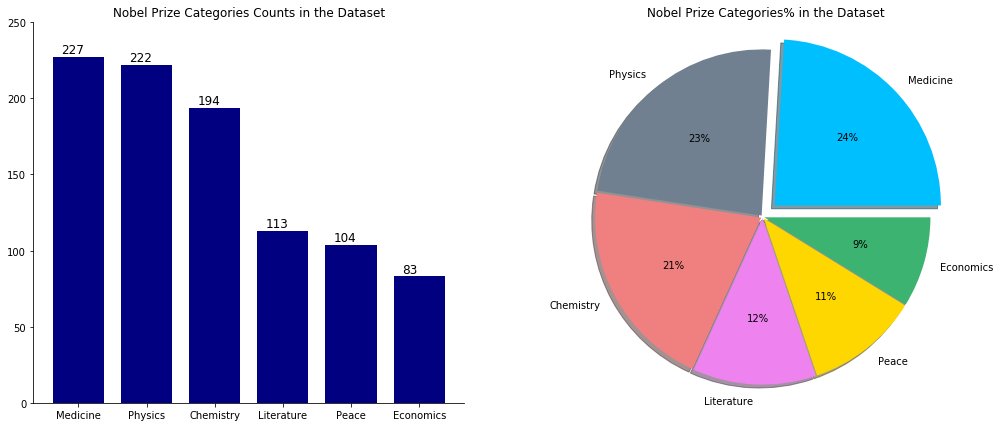

In [38]:
fig = plt.figure(figsize = (17, 7), facecolor = None) 
ax1 = plt.subplot(1, 2, 1)

xvals = df.Category.value_counts().index
yvals = df.Category.value_counts().values
plt.bar(xvals,yvals, width = 0.75, color='navy')
_ = plt.gca().set_yticks(np.arange(0, 255, step=50))
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False) 
_ = plt.title("Nobel Prize Categories Counts in the Dataset")
for i in range(0,6):
    plt.text(x= i-0.25, y=yvals[i]+2.5, s= str(yvals[i]), size=12)
    
ax2 = plt.subplot(1, 2, 2)

yvals_percent = (yvals/df.shape[0])*100
yvals_percent = [round(x,1) for x in yvals_percent]
percent_ = [str(x)+"%" for x in yvals_percent]
colors = ['deepskyblue',  'slategrey', 'lightcoral', 'violet', 'gold','mediumseagreen']
explode = (0.1, 0.01, 0.01,0.01,0.01,0.01)  
patches, texts,_ = plt.pie(yvals_percent,labels=xvals, explode=explode,colors=colors,
        shadow=True, startangle=0, autopct='%1.0f%%',)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
_ = plt.title('Nobel Prize Categories% in the Dataset')

#### Let's look at the variation of number of winners in each categories over decades.

In [39]:
df['Decade'] = (np.floor(df["Year"]/10)*10).astype('int')

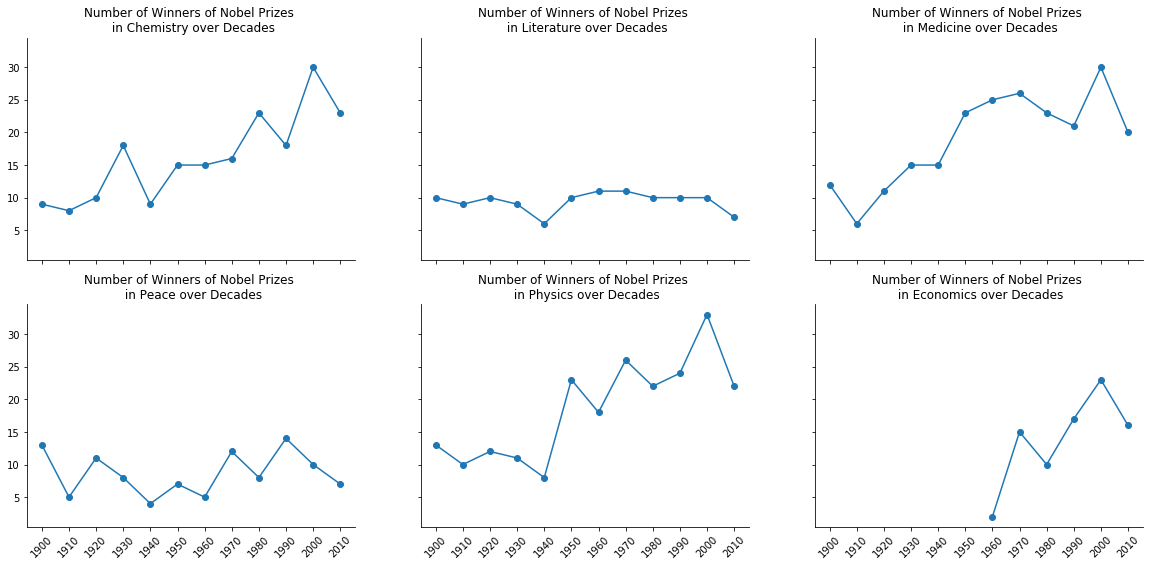

In [40]:
group = df.groupby(['Decade','Category'], as_index=False)['Category'].agg(['count'])

group = group.reset_index(drop=False)

y_t = np.arange(0, 40, step=5)
x_t = np.arange(1900, 2020, step=10)

categories = pd.unique(group["Category"]).copy().tolist()
fig, axes = plt.subplots(2, 3, sharex=True, sharey=True,figsize = (20, 9))

for i in range(0,2):
    for j in range(0,3):
        _ = axes[i,j].plot(group[group["Category"]==categories[0]]["Decade"],
             group[group["Category"]==categories[0]]["count"], '-o')
        _ = axes[i,j].title.set_text('Number of Winners of Nobel Prizes \n in '+categories[0]+' over Decades')
        categories.remove(categories[0])
        axes[i,j].set_xticks(x_t)
        axes[i,j].set_xticklabels(x_t)
        plt.setp(axes[i,j].xaxis.get_majorticklabels(), rotation=45)
        axes[i,j].spines['top'].set_visible(False)
        axes[i,j].spines['right'].set_visible(False)

<h2> <font color="darkblue">Task 2:</font> </h2> <h3>So, Who Gets Nobel Prize?</h3>

Just looking at the first couple of prize winners, or Nobel laureates as they are also called, we already see a celebrity: Wilhelm Conrad Röntgen, the guy who discovered X-rays. And actually, we see that all of the winners in 1901 were guys that came from Europe. But that was back in 1901, looking at all winners in the dataset, from 1901 to 2016, which sex and which country is the most commonly represented?
</blockquote> 

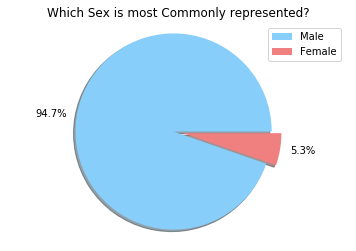

Male      893
Female     50
Name: Sex, dtype: int64
*****************************************
Which Sex is most Commonly represented?
United States of America    276
United Kingdom               88
Germany                      70
France                       53
Sweden                       30
Japan                        29
Russia                       20
Netherlands                  19
Italy                        18
Canada                       18
Name: Birth Country, dtype: int64


In [41]:
unique_sex = pd.unique(df['Sex'])
unique_sex_counts = df.Sex.value_counts().values
unique_sex_percent = (unique_sex_counts/df.shape[0])*100
unique_sex_percent = [round(x,1) for x in unique_sex_percent]
percent_ = [str(x)+"%" for x in unique_sex_percent]
colors = ['lightskyblue', 'lightcoral']
explode = (0,  0.1)  
patches, texts = plt.pie(unique_sex_percent,labels=percent_, explode=explode,colors=colors,
        shadow=True, startangle=0)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.legend(patches, unique_sex, loc=1)
plt.title('Which Sex is most Commonly represented?')
plt.show()
print(df["Sex"].value_counts())
print("*****************************************")
print("Which Sex is most Commonly represented?")
print(df["Birth Country"].value_counts().nlargest(10))

<h2> <font color="darkblue">Task 3:</font> </h2> <h3>USA dominance</h3>
<blockquote> 
Not so surprising perhaps: the most common Nobel laureate between 1901 and 2016 was a man born in the United States of America. But in 1901 all the winners were European. When did the USA start to dominate the Nobel Prize charts?
</blockquote> 

In [42]:
df["American"] = df["Birth Country"]=="United States of America"
# For Visualization Purpose
group2 = df.groupby(['Decade','American'], as_index=False)['American'].agg(['count'])
group2 = group2.reset_index(drop=False)
#
group1 = df.groupby(['Decade'], as_index=False)['American'].agg(['mean'])
group1

,mean
Decade,
1900,0.017544
1910,0.078947
1920,0.074074
1930,0.245902
1940,0.309524
1950,0.282051
1960,0.276316
1970,0.311321
1980,0.322917


<h2> <font color="darkblue">Task 4:</font> </h2> <h3>USA dominance, visualized</h3>
<blockquote> 
A table is OK, but to see when the USA started to dominate the Nobel charts we need a plot!</blockquote> 

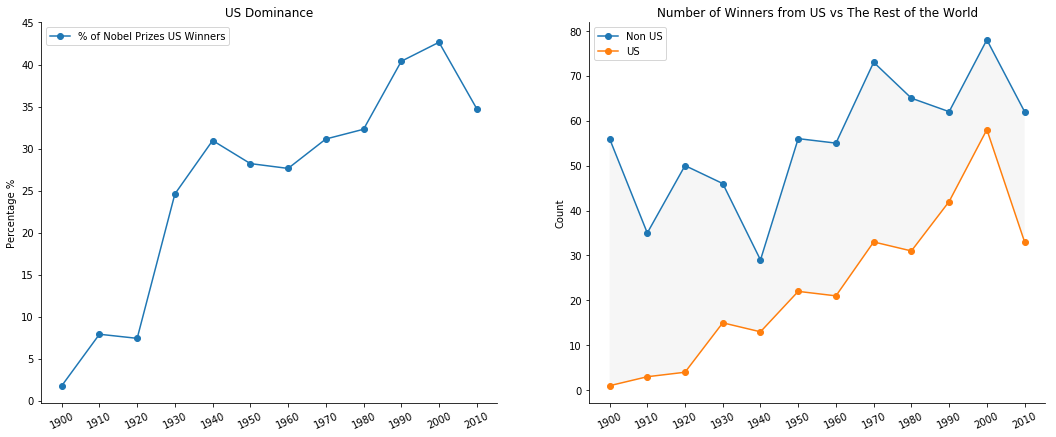

In [44]:
fig = plt.figure(figsize = (18, 7), facecolor = None) 
ax1 = plt.subplot(1, 2, 1)
x_t = np.arange(1900, 2020, step=10)
y_tl = np.arange(0, 50, step=5)
y_t = np.arange(0, 0.50, step=0.05)
group_us = group2[group2["American"]==True]
group_non_us = group2[group2["American"]==False]

ax1 = plt.subplot(1, 2, 1)
_ = plt.plot(x_t,group1["mean"], '-o', label="% of Nobel Prizes US Winners")
plt.gca().set_xticks(x_t)
plt.gca().set_yticks(y_t)
plt.ylabel("Percentage %")
plt.gca().set_xticklabels(x_t)
plt.gca().set_yticklabels(y_tl)
_ = plt.xticks(rotation=25)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
_ = plt.title("US Dominance")
_ = plt.legend()

ax2 = plt.subplot(1, 2, 2)
_ = plt.plot(x_t,group_non_us["count"], '-o', label="Non US")
_ = plt.plot(x_t,group_us["count"], '-o', label="US")
plt.gca().set_xticks(x_t)
plt.gca().set_xticklabels(x_t)
_ = plt.xticks(rotation=25)
plt.ylabel("Count")
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
_ = plt.title("Number of Winners from US vs The Rest of the World")
_ = plt.gca().fill_between(x_t, group_non_us["count"], group_us["count"], facecolor='gainsboro', alpha=0.25)
_ = plt.legend()

<h2> <font color="darkblue">Task 5:</font> </h2> <h3>What is the gender of a typical Nobel Prize winner?</h3>
<blockquote> 
So the USA became the dominating winner of the Nobel Prize first in the 1930s and had kept the leading position ever since. But one group that was in the lead from the start, and never seems to let go, are men. Maybe it shouldn't come as a shock that there is some imbalance between how many male and female prize winners there are, but how significant is this imbalance? And is it better or worse within specific prize categories like physics, medicine, literature, etc.?</blockquote> 

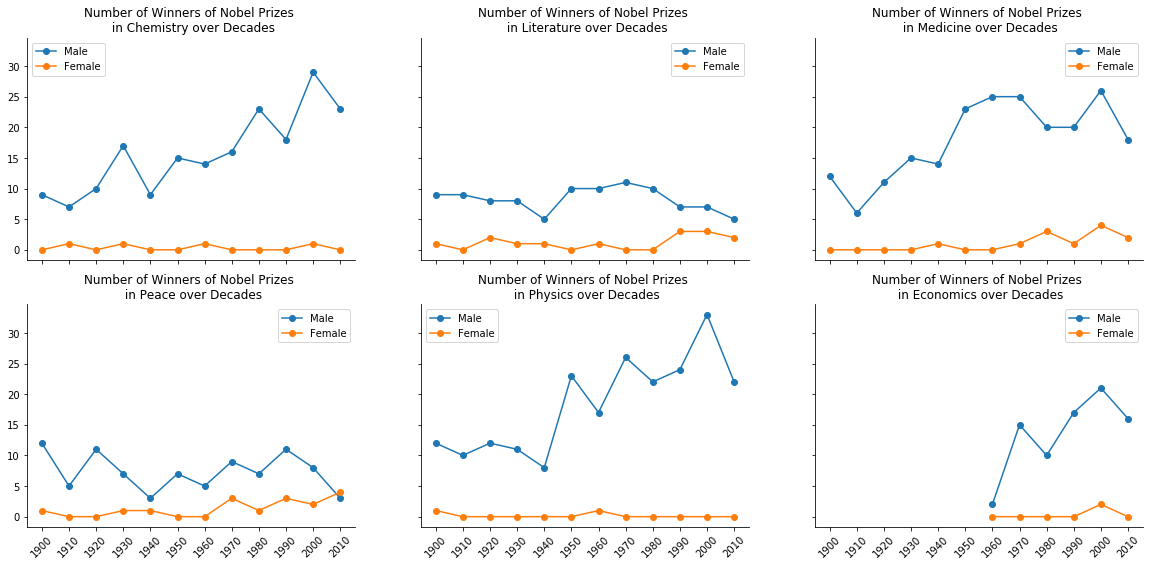

In [45]:
group3 = df.groupby(['Decade','Category','Sex'], as_index=False)['Sex'].agg(['count'])
group3 = group3.unstack(level=-1)
group3.fillna(0, inplace=True)
group3 = group3.reset_index(drop=False)
y_t = np.arange(0, 40, step=5)
x_t = np.arange(1900, 2020, step=10)

categories = pd.unique(group3["Category"]).copy().tolist()
fig, axes = plt.subplots(2, 3, sharex=True, sharey=True,figsize = (20, 9))

for i in range(0,2):
    for j in range(0,3):
        _ = axes[i,j].plot(group3[group3["Category"]==categories[0]]["Decade"], 
             group3[group3["Category"]==categories[0]]["count"]["Male"], '-o',label="Male")
        _ = axes[i,j].plot(group3[group3["Category"]==categories[0]]["Decade"], 
             group3[group3["Category"]==categories[0]]["count"]["Female"], '-o',label="Female")
        _ = axes[i,j].title.set_text('Number of Winners of Nobel Prizes \n in '+categories[0]+' over Decades')
        categories.remove(categories[0])
        axes[i,j].set_xticks(x_t)
        axes[i,j].set_xticklabels(x_t)
        plt.setp(axes[i,j].xaxis.get_majorticklabels(), rotation=45)
        axes[i,j].spines['top'].set_visible(False)
        axes[i,j].spines['right'].set_visible(False)
        _ = axes[i,j].legend()

<h2> <font color="darkblue">Task 6:</font> </h2> <h3>The first woman to win the Nobel Prize</h3>
<blockquote> 
The plot above is a bit messy as the lines are overplotting. But it does show some interesting trends and patterns. Overall the imbalance is pretty large with physics, economics, and chemistry having the largest imbalance. Medicine has a somewhat positive trend, and since the 1990s the literature prize is also now more balanced. The big outlier is the peace prize during the 2010s, but keep in mind that this just covers the years 2010 to 2016.

Given this imbalance, who was the first woman to receive a Nobel Prize? And in what category?
</blockquote> 

In [46]:
df[df['Sex'] == 'Female'].nsmallest(1, 'Year')

,Year,Category,Prize,Motivation,Prize Share,Laureate ID,Laureate Type,Full Name,Birth Date,Birth City,Birth Country,Sex,Organization Name,Organization City,Organization Country,Decade,American
19,1903,Physics,The Nobel Prize in Physics 1903,"""in recognition of the extraordinary services ...",1/4,6,Individual,"Marie Curie, née Sklodowska",1867-11-07,Warsaw,Russian Empire (Poland),Female,Self,Warsaw,Russian Empire (Poland),1900,False


<h2> <font color="darkblue">Task 7:</font> </h2> <h3>Repeat Laureate</h3>
<blockquote> 
For most scientists/writers/activists a Nobel Prize would be the crowning achievement of a long career. But for some people, one is just not enough, and few have gotten it more than once. Who are these lucky few? (Having won no Nobel Prize myself, I'll assume it's just about luck.)
</blockquote> 

In [74]:
x = df.groupby(['Full Name','Year'])['Year'].agg("count")
list = [k for [k,v] in x.keys()]
list_r = [k for k,v in co.Counter(list).items() if v>1]
list_r
df[df["Full Name"].isin(list_r)]

,Year,Category,Prize,Motivation,Prize Share,Laureate ID,Laureate Type,Full Name,Birth Date,Birth City,Birth Country,Sex,Organization Name,Organization City,Organization Country,Decade,American
19,1903,Physics,The Nobel Prize in Physics 1903,"""in recognition of the extraordinary services ...",1/4,6,Individual,"Marie Curie, née Sklodowska",1867-11-07,Warsaw,Russian Empire (Poland),Female,Self,Warsaw,Russian Empire (Poland),1900,False
63,1911,Chemistry,The Nobel Prize in Chemistry 1911,"""in recognition of her services to the advance...",1/1,6,Individual,"Marie Curie, née Sklodowska",1867-11-07,Warsaw,Russian Empire (Poland),Female,Sorbonne University,Paris,France,1910,False
289,1954,Chemistry,The Nobel Prize in Chemistry 1954,"""for his research into the nature of the chemi...",1/1,217,Individual,Linus Carl Pauling,1901-02-28,"Portland, OR",United States of America,Male,California Institute of Technology (Caltech),"Pasadena, CA",United States of America,1950,True
312,1956,Physics,The Nobel Prize in Physics 1956,"""for their researches on semiconductors and th...",1/3,66,Individual,John Bardeen,1908-05-23,"Madison, WI",United States of America,Male,University of Illinois,"Urbana, IL",United States of America,1950,True
320,1958,Chemistry,The Nobel Prize in Chemistry 1958,"""for his work on the structure of proteins, es...",1/1,222,Individual,Frederick Sanger,1918-08-13,Rendcombe,United Kingdom,Male,University of Cambridge,Cambridge,United Kingdom,1950,False
357,1962,Peace,The Nobel Peace Prize 1962,For efforts in Peace,1/1,217,Individual,Linus Carl Pauling,1901-02-28,"Portland, OR",United States of America,Male,California Institute of Technology (Caltech),"Pasadena, CA",United States of America,1960,True
441,1972,Physics,The Nobel Prize in Physics 1972,"""for their jointly developed theory of superco...",1/3,66,Individual,John Bardeen,1908-05-23,"Madison, WI",United States of America,Male,University of Illinois,"Urbana, IL",United States of America,1970,True
525,1980,Chemistry,The Nobel Prize in Chemistry 1980,"""for their contributions concerning the determ...",1/4,222,Individual,Frederick Sanger,1918-08-13,Rendcombe,United Kingdom,Male,MRC Laboratory of Molecular Biology,Cambridge,United Kingdom,1980,False


<h2> <font color="darkblue">Task 8:</font> </h2> <h3>How old are you when you get the prize?</h3>
<blockquote> 
The list of repeat winners contains some illustrious names! We again meet Marie Curie, who got the prize in physics for discovering radiation and in chemistry for isolating radium and polonium. John Bardeen got it twice in physics for transistors and superconductivity, Frederick Sanger got it twice in chemistry, and Linus Carl Pauling got it first in chemistry and later in peace for his work in promoting nuclear disarmament. We also learn that organizations also get the prize as both the Red Cross and the UNHCR have gotten it twice.
<br>
But how old are you generally when you get the prize?</blockquote> 

<IPython.core.display.Javascript object>


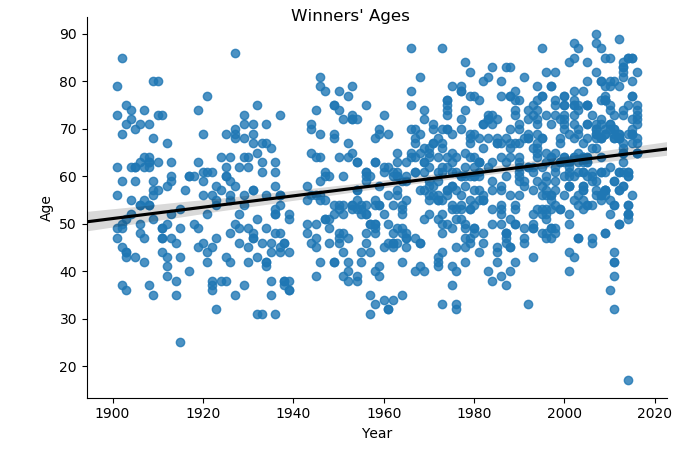

In [126]:
df["Age"] = df["Year"] - df["Birth Date"].dt.year
plot = sns.lmplot(x='Year', y='Age', data=df, line_kws={'color': 'black'})
plot.fig.set_size_inches(7,4.5)
ax = plot.fig
_ = ax.suptitle("Winners' Ages")

<h2> <font color="darkblue">Task 9:</font> </h2> <h3>Age differences between prize categories</h3>
<blockquote> 
The plot above shows us a lot! We see that people use to be around 55 when they received the price, but nowadays the average is closer to 65. But there is a large spread in the laureates' ages, and while most are 50+, some are very young.
<br>
We also see that the density of points is much high nowadays than in the early 1900s -- nowadays many more of the prizes are shared, and so there are many more winners. We also see that there was a disruption in awarded prizes around the Second World War (1939 - 1945).
<br>
Let's look at age trends within different prize categories.</blockquote> 

<IPython.core.display.Javascript object>


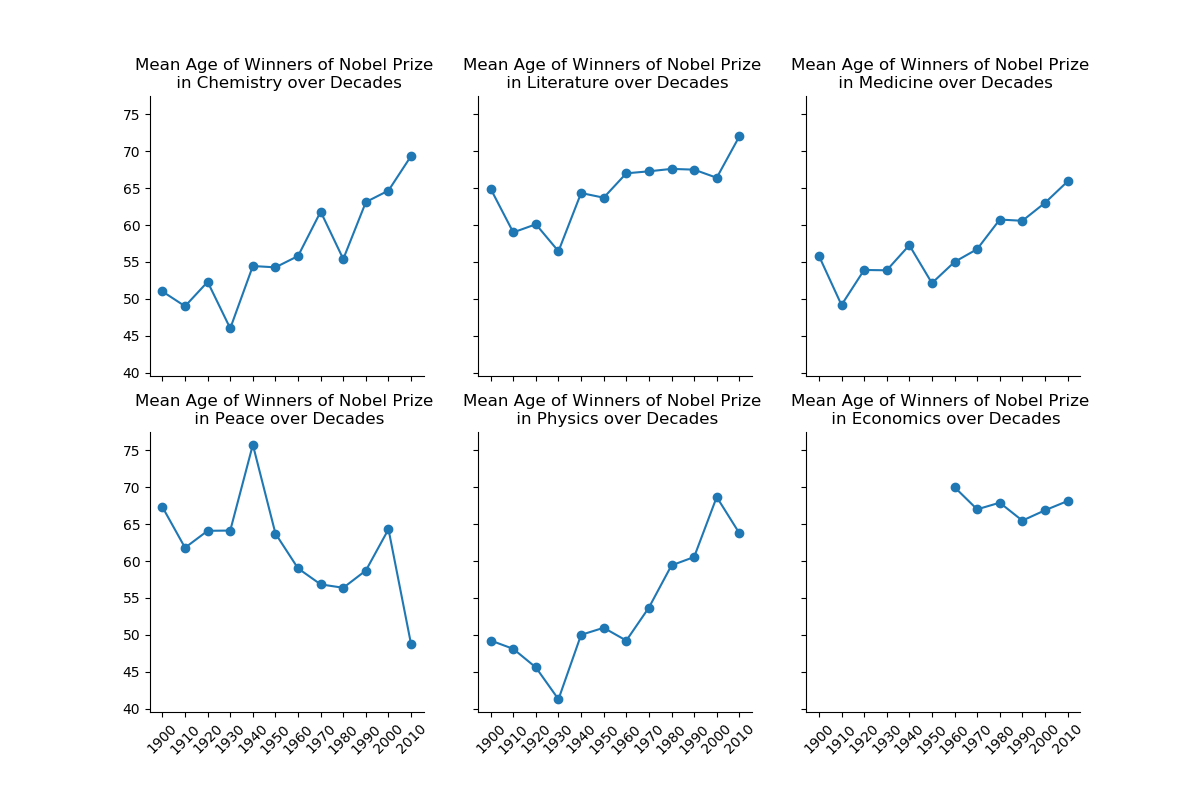

In [123]:
group = df.groupby(['Decade','Category'], as_index=False)['Age'].agg(['mean'])

group = group.reset_index(drop=False)

y_t = np.arange(0, 40, step=5)
x_t = np.arange(1900, 2020, step=10)

categories = pd.unique(group["Category"]).copy().tolist()
fig, axes = plt.subplots(2, 3, sharex=True, sharey=True,figsize = (12, 8))

for i in range(0,2):
    for j in range(0,3):
        _ = axes[i,j].plot(group[group["Category"]==categories[0]]["Decade"],
             group[group["Category"]==categories[0]]["mean"], '-o')
        _ = axes[i,j].title.set_text('Mean Age of Winners of Nobel Prize \n in '+categories[0]+' over Decades')
        categories.remove(categories[0])
        axes[i,j].set_xticks(x_t)
        axes[i,j].set_xticklabels(x_t)
        plt.setp(axes[i,j].xaxis.get_majorticklabels(), rotation=45)
        axes[i,j].spines['top'].set_visible(False)
        axes[i,j].spines['right'].set_visible(False)

#### Below is a representation for Winners' Age per Category

<IPython.core.display.Javascript object>


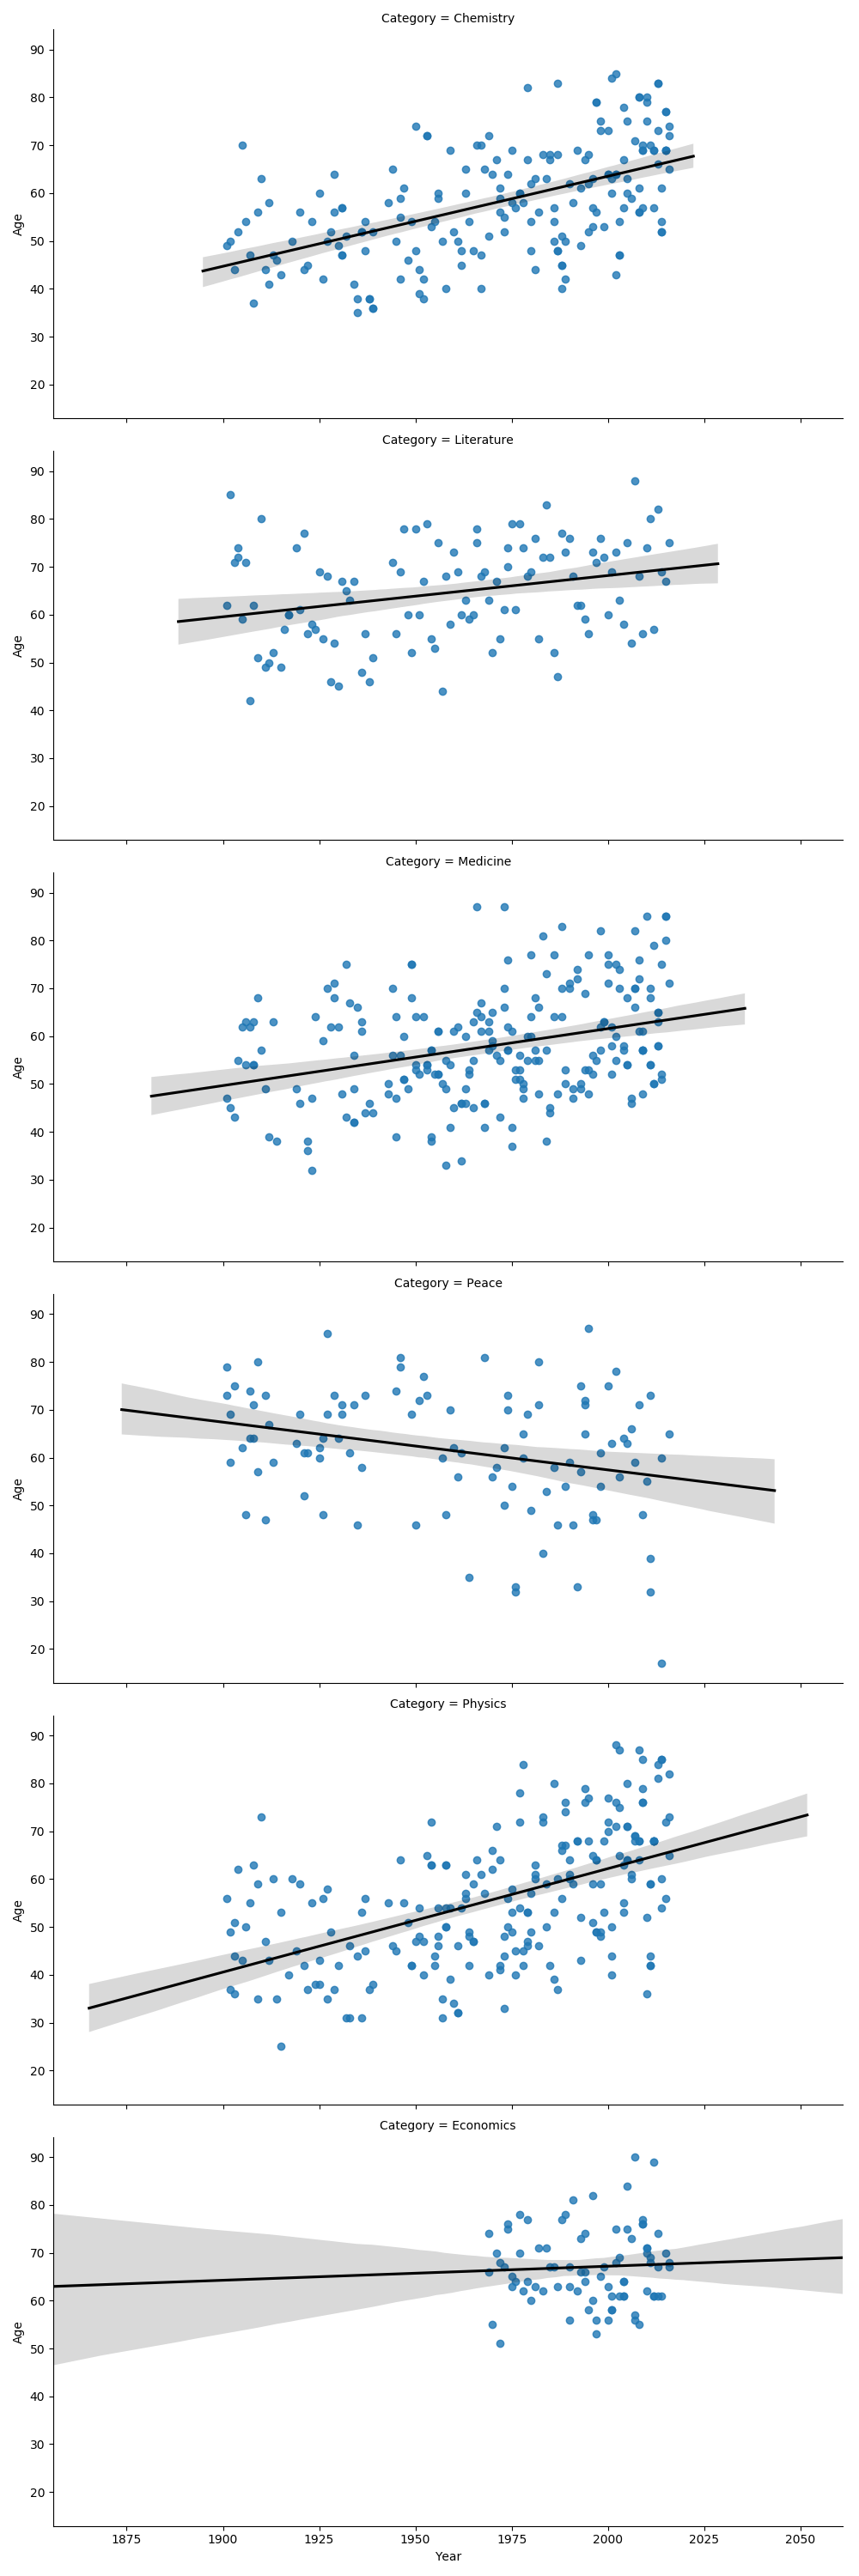

In [122]:
sns.lmplot(x='Year', y='Age', row='Category', data=df, aspect=2, line_kws={'color': 'black'})

<h2> <font color="darkblue">Task 10:</font> </h2> <h3>Oldest and youngest winners</h3>
<blockquote> 
More plots with lots of exciting stuff going on! We see that both winners of the chemistry, medicine, and physics prize have gotten older over time. The trend is strongest for physics: the average age used to be below 50, and now it's almost 70. Literature and economics are more stable. We also see that economics is a newer category. But peace shows an opposite trend where winners are getting younger!
<br>
In the peace category we also a winner around 2010 that seems exceptionally young. This begs the questions, who are the oldest and youngest people ever to have won a Nobel Prize?</blockquote>

In [132]:
print("The Oldest Winner of Nobel Prize:")
display(df.nlargest(1, 'Age'))
print("*****************************************")
print("The Youngest Winner of Nobel Prize:")
display(df.nsmallest(1, 'Age'))

The Oldest Winner of Nobel Prize:


,Year,Category,Prize,Motivation,Prize Share,Laureate ID,Laureate Type,Full Name,Birth Date,Birth City,Birth Country,Sex,Organization Name,Organization City,Organization Country,Decade,American,Age
825,2007,Economics,The Sveriges Riksbank Prize in Economic Scienc...,"""for having laid the foundations of mechanism ...",1/3,820,Individual,Leonid Hurwicz,1917-08-21,Moscow,Russia,Male,University of Minnesota,"Minneapolis, MN",United States of America,2000,False,90


*****************************************
The Youngest Winner of Nobel Prize:


,Year,Category,Prize,Motivation,Prize Share,Laureate ID,Laureate Type,Full Name,Birth Date,Birth City,Birth Country,Sex,Organization Name,Organization City,Organization Country,Decade,American,Age
940,2014,Peace,The Nobel Peace Prize 2014,"""for their struggle against the suppression of...",1/2,914,Individual,Malala Yousafzai,1997-07-12,Mingora,Pakistan,Female,Self,Mingora,Pakistan,2010,False,17


<h2> <font color="darkblue">Task 11:</font> </h2> <h3>You get a prize!</h3>
<blockquote> 
Hey! You get a prize for making it to the very end of this notebook! It might not be a Nobel Prize, but I made it myself in paint so it should count for something. But don't despair, Leonid Hurwicz was 90 years old when he got his prize, so it might not be too late for you. Who knows.
<br>
Before you leave, what was again the name of the youngest winner ever who in 2014 got the prize for "[her] struggle against the suppression of children and young people and for the right of all children to education"?
</blockquote>

In [133]:
youngest_winner = 'Malala Yousafzai'
youngest_winner

'Malala Yousafzai'